In [1]:
import json
from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import hashlib
import re
def remove_whitespaces(s: str):
    return re.sub(r'\s+', '', s)

sns.set_context("paper")
sns.set_palette("deep")
color_palette = sns.color_palette()
color_palette

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [2]:
# const GLenum POINTS                         = 0x0000;
# const GLenum LINES                          = 0x0001;
# const GLenum LINE_LOOP                      = 0x0002;
# const GLenum LINE_STRIP                     = 0x0003;
# const GLenum TRIANGLES                      = 0x0004;
# const GLenum TRIANGLE_STRIP                 = 0x0005;
# const GLenum TRIANGLE_FAN                   = 0x0006;
gl_types = {
    0: "POINTS",
    1: "LINES",
    2: "LINE_LOOP",
    3: "LINE_STRIP",
    4: "TRIANGLES",
    5: "TRIANGLE_STRIP",
    6: "TRIANGLE_FAN",
}

In [62]:
df_frame = pd.read_pickle('imr/0501-df_frame-raf.pkl.zst', compression='zstd')
# df_context = pd.read_pickle('imr/0501-df_context.pkl.zst', compression='zstd')
df_context_noraf = pd.read_pickle('imr/0501-df_context-noraf.pkl.zst', compression='zstd')
# df_shader = pd.read_pickle('imr/0501-df_shader-noraf.pkl.zst', compression='zstd')

In [4]:
# print("Frame shape:", df_frame.shape)
print("Context shape:", df_context_noraf.shape)

Context shape: (34816, 356)


In [39]:
def url_essential(x):
    if x.startswith('http://'):
        x = x[7:]
    if x.startswith('https://'):
        x = x[8:]
    return x.strip('/')

In [44]:
func_count_list = [x for x in df_context_noraf.columns.to_list() if x.startswith('frame.context.maghsk.counter.funcCount.')]
func_count_list

['frame.context.maghsk.counter.funcCount.getShaderPrecisionFormat',
 'frame.context.maghsk.counter.funcCount.getParameter',
 'frame.context.maghsk.counter.funcCount.getExtension',
 'frame.context.maghsk.counter.funcCount.createTexture',
 'frame.context.maghsk.counter.funcCount.bindTexture',
 'frame.context.maghsk.counter.funcCount.texParameteri',
 'frame.context.maghsk.counter.funcCount.texImage2D',
 'frame.context.maghsk.counter.funcCount.texImage3D',
 'frame.context.maghsk.counter.funcCount.clearColor',
 'frame.context.maghsk.counter.funcCount.clearDepth',
 'frame.context.maghsk.counter.funcCount.clearStencil',
 'frame.context.maghsk.counter.funcCount.enable',
 'frame.context.maghsk.counter.funcCount.depthFunc',
 'frame.context.maghsk.counter.funcCount.frontFace',
 'frame.context.maghsk.counter.funcCount.cullFace',
 'frame.context.maghsk.counter.funcCount.getContextAttributes',
 'frame.context.maghsk.counter.funcCount.viewport',
 'frame.context.maghsk.counter.funcCount.createBuffer',

In [61]:
df_context_noraf

,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.createArguments.1.device_pixel_ratio,frame.context.maghsk.createArguments.1.stencilBuffer,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.counter.textureTypes.,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt
0,0,0,['bq'],0,1,0,,http://0ldsk00l.ca/,1683111281895,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,['bq'],0,3,0,,http://1000000-lives.com/,1683112057380,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,['bq'],0,3,0,,http://1000000-lives.com/,1683112057380,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2,['bq'],0,3,0,,http://1000000-lives.com/,1683112057380,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2,['bq'],0,3,0,,http://1000000-lives.com/,1683112057380,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34811,113890,29230,['bq'],0,1,1,,https://zycieczestochowy.pl/wydanie-9-05-2022/,1683165464020,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34812,113892,29231,[tranco],3,1,0,,https://zylotrade.com/,1683165490283,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34813,113896,29233,['bq'],0,4,0,,https://zzm8.com/,1683165543480,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34814,113898,29235,['bq'],0,1,1,,https://ggk.kz/,1683165591545,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
 df_context_noraf.duplicated(subset='idx', keep='first')

0        False
1        False
2         True
3         True
4         True
         ...  
34811     True
34812    False
34813    False
34814    False
34815    False
Length: 34816, dtype: bool

In [59]:
# tmp = df_context_noraf
tmp = df_context_noraf.duplicated(subset='idx', keep='first')
tmp = tmp[tmp['frame.url'].map(lambda x: url_essential(x.strip())) != tmp['url'].map(lambda x: url_essential(x.strip()))]
tmp[tmp[func_count_list].sum(axis=1) > 100][['url', 'frame.url']]

,url,frame.url
50,http://3d.kommunekart.com/,http://3d.kommunekart.com/?x=51&y=9.9999999999...
90,http://aalimentaria.com,https://www.aalimentaria.com/en
107,http://aday.sanko.edu.tr/sanaltur.aspx,https://app.cloudpano.com/tours/hJhBzU3W9B
110,http://adova-group.com,http://adova-group.com/en
133,http://aircraft.myfoxhurricane.com/,https://aircraft.myfoxhurricane.com/recon/reco...
...,...,...
34664,https://zezman.ua/,https://zezman.ua/ua/
34665,https://zgodanazycie.pl/donation-solidarity,https://zgodanazycie.pl/wystawa/solidarnie-dla...
34763,https://zseth.edu.lodz.pl/,https://mpembed.com/bundle_23.4.1_webgl-83-g65...
34765,https://zsethlodz.wikom.pl/,https://mpembed.com/bundle_23.4.1_webgl-83-g65...


In [55]:
df_context_noraf[df_context_noraf[func_count_list].sum(axis=1) > 100]

,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.createArguments.1.device_pixel_ratio,frame.context.maghsk.createArguments.1.stencilBuffer,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.counter.textureTypes.,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt
0,0,0,['bq'],0,1,0,,http://0ldsk00l.ca/,1683111281895,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,['bq'],0,3,0,,http://1000000-lives.com/,1683112057380,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2,['bq'],0,3,0,,http://1000000-lives.com/,1683112057380,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2,['bq'],0,3,0,,http://1000000-lives.com/,1683112057380,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,2,['bq'],0,3,0,,http://1000000-lives.com/,1683112057380,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34809,113881,29224,['bq'],0,1,1,,https://zurstrass.com/,1683165297800,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34811,113890,29230,['bq'],0,1,1,,https://zycieczestochowy.pl/wydanie-9-05-2022/,1683165464020,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34812,113892,29231,[tranco],3,1,0,,https://zylotrade.com/,1683165490283,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34814,113898,29235,['bq'],0,1,1,,https://ggk.kz/,1683165591545,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_context_noraf['idx-frame'].value_counts().describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99])

count    18764.000000
mean         1.855468
std          1.883598
min          1.000000
50%          1.000000
75%          2.000000
90%          4.000000
95%          4.000000
99%          7.000000
max        152.000000
Name: count, dtype: float64

In [6]:
df_context_noraf['idx-frame'].value_counts()

idx-frame
41191     152
6847       36
89557      35
75567      26
56671      25
         ... 
48916       1
48917       1
48948       1
48973       1
113901      1
Name: count, Length: 18764, dtype: int64

In [7]:
df_context_noraf[df_context_noraf['idx-frame']==41191].to_excel('tmp.xlsx')

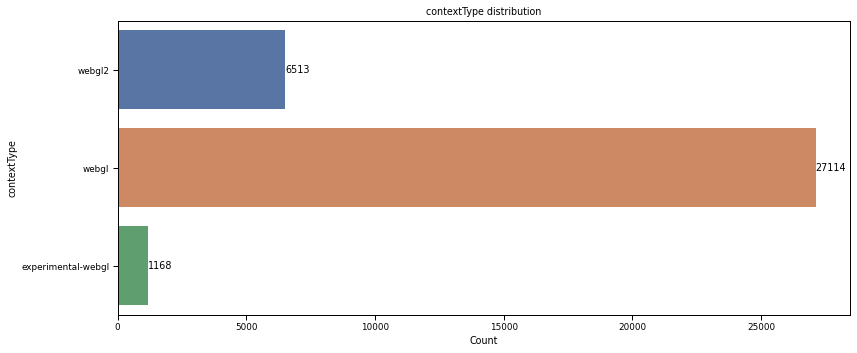

In [8]:
# df_context_noraf["frame.context.maghsk.createArguments.0"].value_counts()
fig, axes = plt.subplots(figsize=(12, 5))
sns.countplot(y="frame.context.maghsk.createArguments.0", data=df_context_noraf, ax=axes)
axes.set_xlabel('Count')
axes.set_ylabel('contextType')
axes.set_title('contextType distribution')
for rect in axes.patches:
    axes.annotate(f'{rect.get_width():.0f}', (rect.get_width(), rect.get_y()+rect.get_height()/2), ha='left', va='center')
plt.tight_layout()

## shader

In [96]:
df_shader = pd.read_pickle('imr/0501-df_shader-noraf.pkl.zst', compression='zstd').explode('frame.context.maghsk.shaders.source').dropna(subset=['frame.context.maghsk.shaders.source'])
df_shader.memory_usage(deep=True)

Index                                      1226880
idx-context                                1226880
idx-frame                                  1226880
idx                                        1226880
category                                  10709755
label_ERROR                                1380240
label_usecase                              1380240
label_interactions                         1380240
label_comments                             8771788
url                                       13623479
date                                       1226880
raf_path                                  15182640
frame.url                                 16512675
frame.title                               14572305
frame.date                                 6134400
frame.when                                 1226880
frame.context.maghsk.shaders.id            1226880
frame.context.maghsk.shaders.compiled       153360
frame.context.maghsk.shaders.source      824216336
frame.context.maghsk.shaders.ty

In [97]:
a = df_shader.explode('frame.context.maghsk.shaders.source').dropna(subset=['frame.context.maghsk.shaders.source']).drop_duplicates(subset=['frame.context.maghsk.shaders.source'])
Path('./imr/shaders/vert').mkdir(exist_ok=True, parents=True)
Path('./imr/shaders/frag').mkdir(exist_ok=True, parents=True)
for idx, row in a.iterrows():
    t = row['frame.context.maghsk.shaders.type']
    s = row['frame.context.maghsk.shaders.source']
    with open(f'./imr/shaders/{t}/{idx}.c', 'w') as fp:
        fp.write(s)
    

In [98]:
df_shader = df_shader.astype({'frame.context.maghsk.shaders.source': str})

In [99]:
df_shaders_trim = df_shader
df_shaders_trim['frame.context.maghsk.shaders.sourceTrimedHashed'] = df_shaders_trim['frame.context.maghsk.shaders.source'].apply(lambda x: hashlib.sha256(remove_whitespaces(x).encode('utf-8')).hexdigest())
df_shaders_trim = df_shaders_trim[['idx-context', 'idx-frame', 'idx', 'category', 'label_ERROR', 'label_usecase', 'label_interactions', 'label_comments', 'url', 'frame.url', 'frame.title', 'frame.context.maghsk.shaders.type', 'frame.context.maghsk.shaders.sourceTrimedHashed', 'frame.context.maghsk.shaders.source', 'frame.context.maghsk.shaders.length']]
df_shaders_trim

,idx-context,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,frame.url,frame.title,frame.context.maghsk.shaders.type,frame.context.maghsk.shaders.sourceTrimedHashed,frame.context.maghsk.shaders.source,frame.context.maghsk.shaders.length
0,0,0,0,['bq'],0,1,0,,http://0ldsk00l.ca/,http://0ldsk00l.ca/,0ldsk00l,vert,e4838c6bcde648aaa04dd0f59d5621b7566915da7dc95f...,#version 300 es\nprecision mediump sampler2DAr...,17898
1,0,0,0,['bq'],0,1,0,,http://0ldsk00l.ca/,http://0ldsk00l.ca/,0ldsk00l,frag,f33c97c694e2a34efc049c3b20ee02c025be68ce53772b...,#version 300 es\n#define varying in\nlayout(lo...,61058
2,2,2,2,['bq'],0,3,0,,http://1000000-lives.com/,http://1000000-lives.com/,TVアニメ「100万の命の上に俺は立っている」公式サイト,vert,4add4b3ecd9841da6ece0afe52af1e8bccad11d699ee50...,precision highp float;\n#define SHADER_NAME pi...,698
3,2,2,2,['bq'],0,3,0,,http://1000000-lives.com/,http://1000000-lives.com/,TVアニメ「100万の命の上に俺は立っている」公式サイト,frag,b1455c420d8d5c84e928b0f5cbd5b7da1a67ba6e96e340...,precision mediump float;\n#define SHADER_NAME ...,242
4,2,2,2,['bq'],0,3,0,,http://1000000-lives.com/,http://1000000-lives.com/,TVアニメ「100万の命の上に俺は立っている」公式サイト,vert,3cb0c32181c705a89e6c7871e908b112385287aba09477...,precision highp float;\n#define SHADER_NAME pi...,428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153677,34815,113901,29238,['bq'],0,1,1,,https://map.e-zhetisu.kz/,https://map.e-zhetisu.kz/,Геопортал области Жетісу,vert,6a6e52704fb925c5f4d2bdc6e413d2040076b8e4288874...,\n #ifdef GL_ES\n precision highp float;\n ...,8654
153678,34815,113901,29238,['bq'],0,1,1,,https://map.e-zhetisu.kz/,https://map.e-zhetisu.kz/,Геопортал области Жетісу,frag,9c90e08c35f3732722d76347c72ee093df80decf4d66e3...,#define HAS_UNIFORM_u_fill_color\n#define HAS_...,5715
153679,34815,113901,29238,['bq'],0,1,1,,https://map.e-zhetisu.kz/,https://map.e-zhetisu.kz/,Геопортал области Жетісу,vert,aa3b49f6d5254c4a3ac3ad1dade792e6559ccbbc75c22e...,#define HAS_UNIFORM_u_fill_color\n#define HAS_...,15154
153680,34815,113901,29238,['bq'],0,1,1,,https://map.e-zhetisu.kz/,https://map.e-zhetisu.kz/,Геопортал области Жетісу,frag,1c3050469ca68d5f972e329b7e72513130ed8628c6d779...,#define HAS_UNIFORM_u_opacity\n#define HAS_UNI...,4164


In [100]:
# # group by source and count the different urls
# df_source_count = df_shaders_trim.groupby('shader_source_trimmed_hashed')[['index-program','index-context','index-url']].nunique()
# tmp = df_shaders_trim.set_index('shader_source_trimmed_hashed')[['shader_type','shader_source','shader_length']]
# tmp = tmp[~tmp.index.duplicated(keep='first')]
# df_source_count = df_source_count.join(tmp, how='inner')
# df_source_count.reset_index(inplace=True)
# df_source_count.index.name = 'index-source'
# df_source_count
df_source_count = df_shaders_trim.groupby('frame.context.maghsk.shaders.sourceTrimedHashed')[['idx-context','idx-frame', 'frame.url', 'frame.title', 'url']].nunique()
tmp = df_shaders_trim.set_index('frame.context.maghsk.shaders.sourceTrimedHashed')[['frame.context.maghsk.shaders.type','frame.context.maghsk.shaders.source', 'frame.context.maghsk.shaders.length']]
tmp = tmp[~tmp.index.duplicated(keep='first')]
df_source_count = df_source_count.join(tmp, how='inner')
df_source_count.reset_index(inplace=True)
df_source_count.index.name = 'idx-source'
df_source_count

,frame.context.maghsk.shaders.sourceTrimedHashed,idx-context,idx-frame,frame.url,frame.title,url,frame.context.maghsk.shaders.type,frame.context.maghsk.shaders.source,frame.context.maghsk.shaders.length
idx-source,,,,,,,,,
0,0000cc4a9da26756ecad94db283d83dc37d1a58b4e5c7a...,1,1,1,1,1,frag,precision highp float;\nprecision highp int;\n...,4437
1,0005da429f7423e7820f937b4a8071583fdaefde7b70e2...,1,1,1,1,1,frag,#version 300 es\n#define varying in\nlayout(lo...,9157
2,000a6bf276879d90d2da58b14ee0cc8c6d4d90edf05b3f...,1,1,1,1,1,frag,#version 300 es\n#define varying in\nout highp...,10097
3,000b92a60950d1c172ce9f6ca983d9e19295d6c3810613...,951,951,819,198,819,vert,#ifdef GL_FRAGMENT_PRECISION_HIGH\nprecision h...,345
4,000bfbfe6e9d0cbe0ee0b5df0e65a8db25b9ddf64edee2...,1,1,1,1,1,vert,precision highp float;\nprecision highp int;\n...,10587
...,...,...,...,...,...,...,...,...,...
34821,fff230f7c69da2421c0f1e31881522292fa3b82bb4e510...,1,1,1,1,1,frag,#version 300 es\n#ifdef GL_EXT_shader_texture_...,17042
34822,fff54751ef5e079192298febc4bab0d03b3ce470f89952...,2,2,2,2,2,vert,\n#define WEBGL2\nattribute vec3 aPos;\nattrib...,882
34823,fff84a1537abac08ee7c4a02661f1043f9fb2ed6f5ae31...,1,1,1,1,1,frag,precision highp float;\nprecision highp int;\n...,44464


In [101]:
second_hash = df_source_count.sort_values('idx-context', ascending=False).iloc[0]['frame.context.maghsk.shaders.sourceTrimedHashed']
# df_shaders_trim[df_shaders_trim['frame.context.maghsk.shaders.sourceTrimedHashed']==second_hash]

In [102]:
tmp = df_shaders_trim[df_shaders_trim['frame.context.maghsk.shaders.sourceTrimedHashed']==second_hash]
print("Num:", tmp['url'].nunique())
print(tmp['frame.context.maghsk.shaders.source'].iloc[0])

Num: 875
precision mediump float;
void main(void){
float test = 0.1;
if(test == 0.0){}
else if(test == 1.0){}
else if(test == 2.0){}
else if(test == 3.0){}
else if(test == 4.0){}
else if(test == 5.0){}
else if(test == 6.0){}
else if(test == 7.0){}
else if(test == 8.0){}
else if(test == 9.0){}
else if(test == 10.0){}
else if(test == 11.0){}
else if(test == 12.0){}
else if(test == 13.0){}
else if(test == 14.0){}
else 
gl_FragColor = vec4(0.0);
}


In [103]:
df_source_count

,frame.context.maghsk.shaders.sourceTrimedHashed,idx-context,idx-frame,frame.url,frame.title,url,frame.context.maghsk.shaders.type,frame.context.maghsk.shaders.source,frame.context.maghsk.shaders.length
idx-source,,,,,,,,,
0,0000cc4a9da26756ecad94db283d83dc37d1a58b4e5c7a...,1,1,1,1,1,frag,precision highp float;\nprecision highp int;\n...,4437
1,0005da429f7423e7820f937b4a8071583fdaefde7b70e2...,1,1,1,1,1,frag,#version 300 es\n#define varying in\nlayout(lo...,9157
2,000a6bf276879d90d2da58b14ee0cc8c6d4d90edf05b3f...,1,1,1,1,1,frag,#version 300 es\n#define varying in\nout highp...,10097
3,000b92a60950d1c172ce9f6ca983d9e19295d6c3810613...,951,951,819,198,819,vert,#ifdef GL_FRAGMENT_PRECISION_HIGH\nprecision h...,345
4,000bfbfe6e9d0cbe0ee0b5df0e65a8db25b9ddf64edee2...,1,1,1,1,1,vert,precision highp float;\nprecision highp int;\n...,10587
...,...,...,...,...,...,...,...,...,...
34821,fff230f7c69da2421c0f1e31881522292fa3b82bb4e510...,1,1,1,1,1,frag,#version 300 es\n#ifdef GL_EXT_shader_texture_...,17042
34822,fff54751ef5e079192298febc4bab0d03b3ce470f89952...,2,2,2,2,2,vert,\n#define WEBGL2\nattribute vec3 aPos;\nattrib...,882
34823,fff84a1537abac08ee7c4a02661f1043f9fb2ed6f5ae31...,1,1,1,1,1,frag,precision highp float;\nprecision highp int;\n...,44464


<AxesSubplot:title={'center':'By context'}, xlabel='idx-source', ylabel='Number of Contexts'>

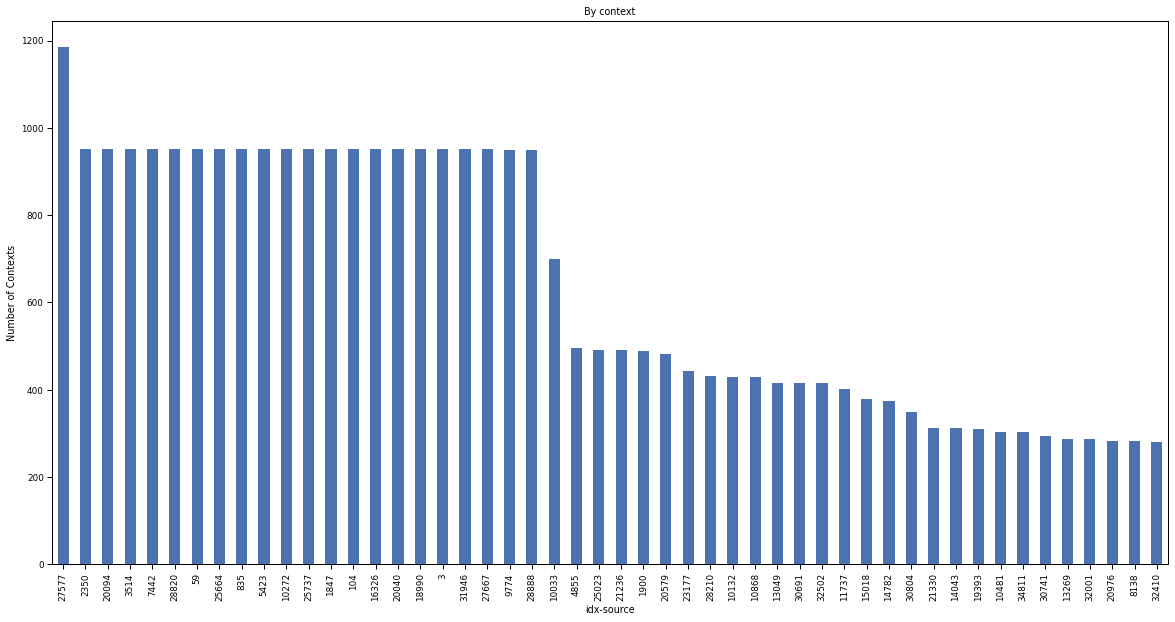

In [104]:
plt.title("By context")
plt.xlabel('Shader ID')
plt.ylabel('Number of Contexts')
df_source_count.sort_values('idx-context', ascending=False).head(50)['idx-context'].plot(kind='bar', figsize=(20, 10))

Text(0, 0.5, 'Shader ID')

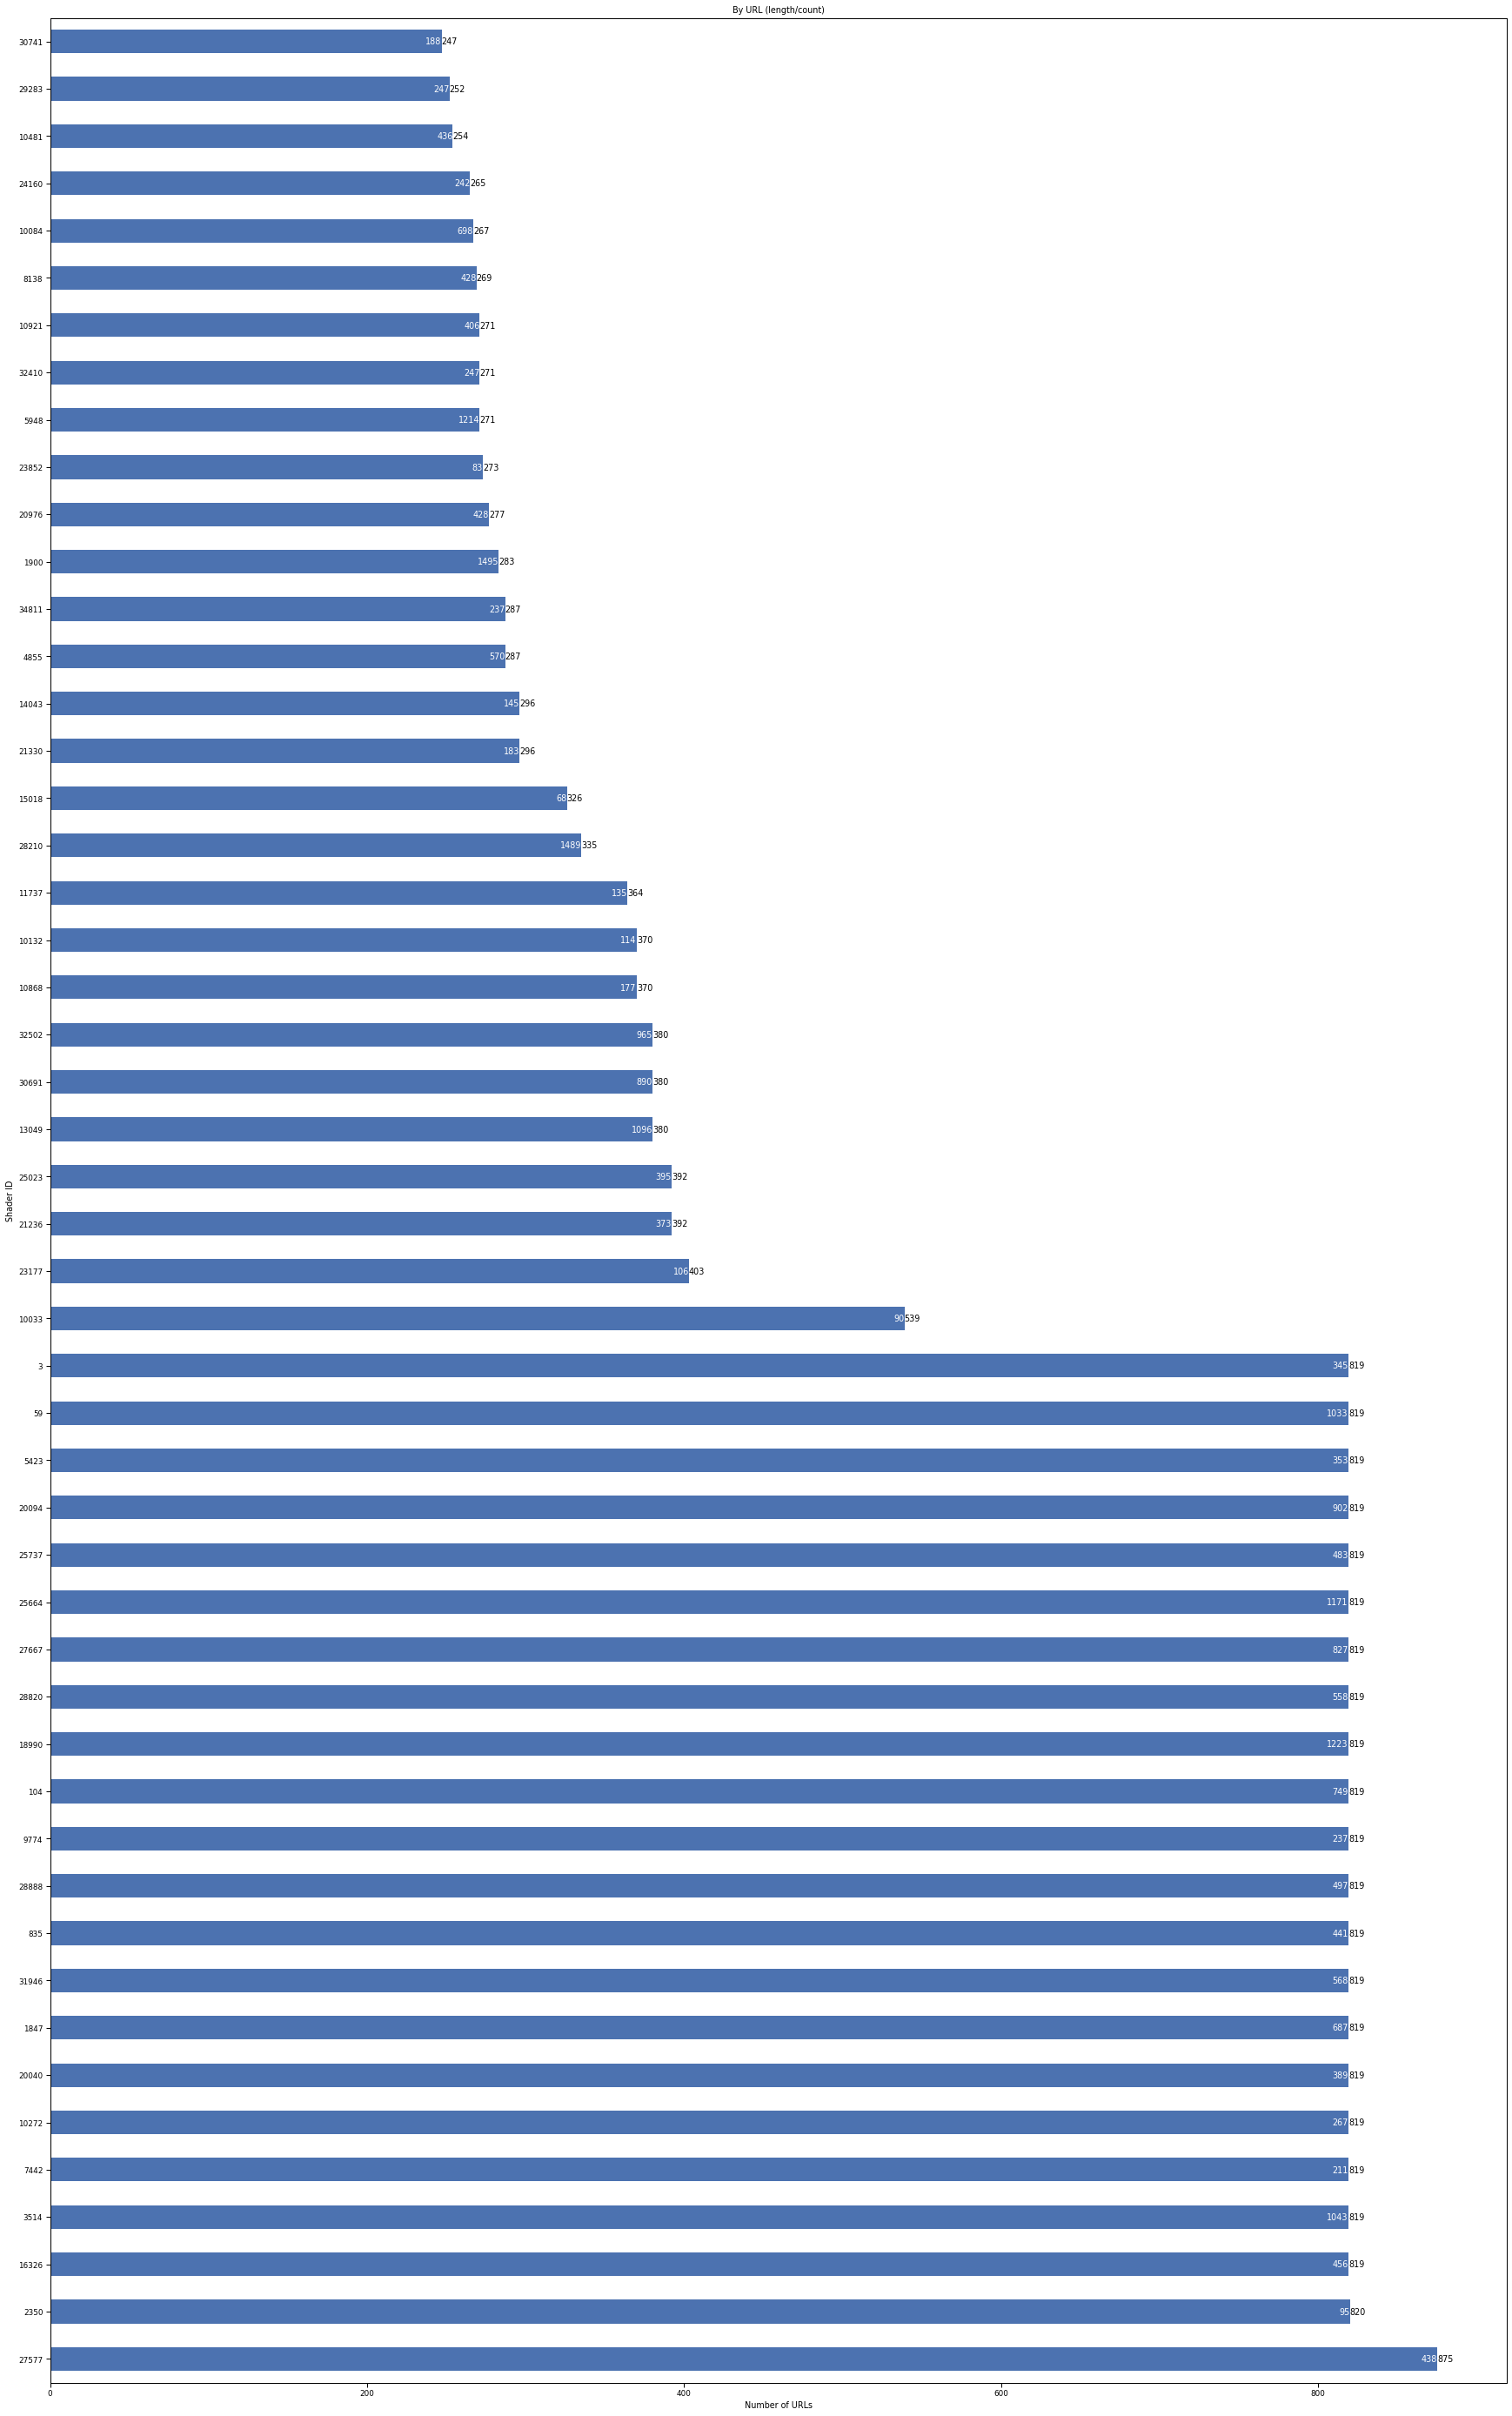

In [105]:
tmp = df_source_count.sort_values('url', ascending=False).head(50)
bar = tmp['url'].plot(kind='barh', figsize=(30, 50))
# bar = sns.barplot(x='url_count', y='index', hue='type', data=tmp, orient='h')
# label length on top of bar
for rect, url_count, length in zip(bar.patches,tmp['url'],tmp['frame.context.maghsk.shaders.length']):
    bar.annotate(f'{url_count}',
                    (rect.get_width(), rect.get_y() + rect.get_height() / 2),
                    ha='left', va='center')
    bar.annotate(f'{length}',
                    (rect.get_width(), rect.get_y() + rect.get_height() / 2),
                    ha='right', va='center', color='white')

# plt.figure(figsize=(30, 50))
plt.title("By URL (length/count)")
plt.xlabel('Number of URLs')
plt.ylabel('Shader ID')


### duplicity

Percentage of all unique shaders by shaders only: 22.71%
Percentage of all unique shaders by ['frame.context.maghsk.shaders.sourceTrimedHashed', 'url']: 32.04%
Percentage of all unique shaders by ['frame.context.maghsk.shaders.sourceTrimedHashed', 'idx-frame']: 29.97%
Percentage of all unique shaders by ['frame.context.maghsk.shaders.sourceTrimedHashed', 'idx-context']: 27.72%


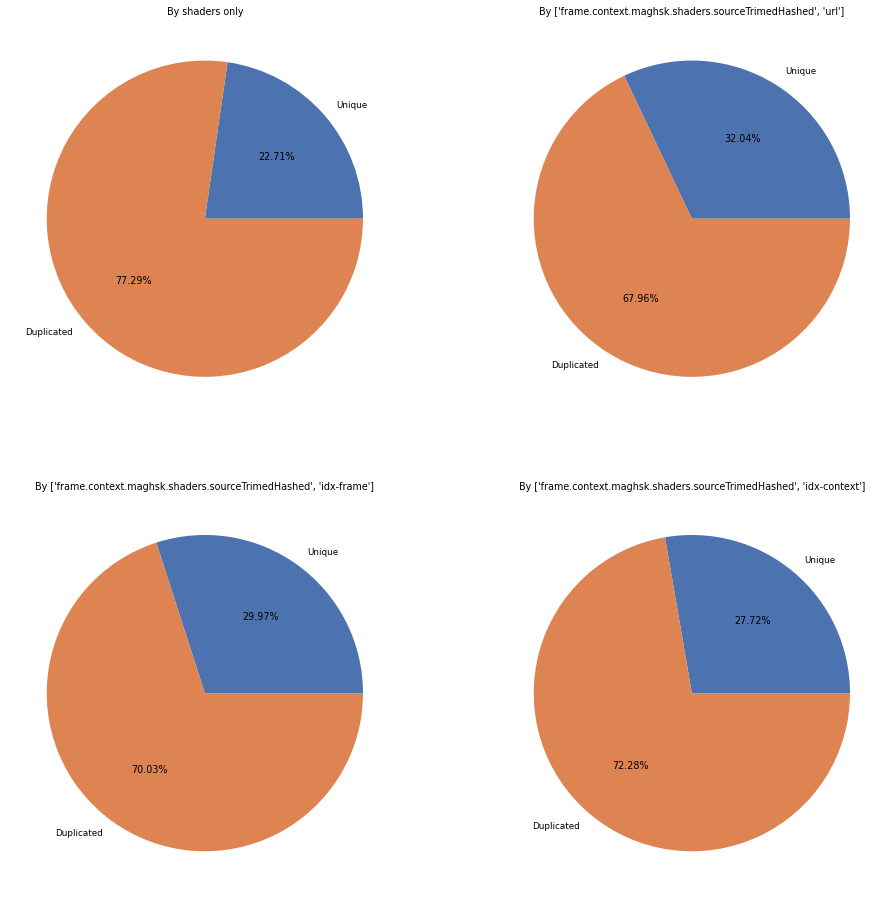

In [20]:
# create figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

# add four figures above to the figure
# subset = [None, ['frame.context.maghsk.shaders.sourceTrimedHashed', 'index-url'], ['frame.context.maghsk.shaders.sourceTrimedHashed', 'index-context']]
subset = [None, ['frame.context.maghsk.shaders.sourceTrimedHashed', 'url'], ['frame.context.maghsk.shaders.sourceTrimedHashed', 'idx-frame'], ['frame.context.maghsk.shaders.sourceTrimedHashed', 'idx-context']]
for i in range(4):
    if subset[i] is None:
        df_shaders_trim_dedup = df_shaders_trim
    else:
        df_shaders_trim_dedup = df_shaders_trim.drop_duplicates(subset=subset[i], keep='first')
    # caculate the duplicity of df_shaders_trim_dedup, by column 'frame.context.maghsk.shaders.sourceTrimedHashed'
    ratio = 1.0 - df_shaders_trim_dedup.duplicated(subset=['frame.context.maghsk.shaders.sourceTrimedHashed'], keep='first').sum() / len(df_shaders_trim_dedup)
    by_str = str(subset[i]) if subset[i] is not None else 'shaders only'
    print("Percentage of all unique shaders by {}: {:.2f}%".format(by_str, ratio*100))
    axes[i//2][i%2].pie([ratio, 1-ratio], labels=['Unique', 'Duplicated'], autopct='%.2f%%')
    axes[i//2][i%2].set_title('By {}'.format(by_str))
plt.show()

Percentage of all unique shaders by shaders only: 25.76%
Percentage of all unique shaders by ['frame.context.maghsk.shaders.sourceTrimedHashed', 'url']: 33.76%
Percentage of all unique shaders by ['frame.context.maghsk.shaders.sourceTrimedHashed', 'idx-frame']: 31.37%
Percentage of all unique shaders by ['frame.context.maghsk.shaders.sourceTrimedHashed', 'idx-context']: 29.17%


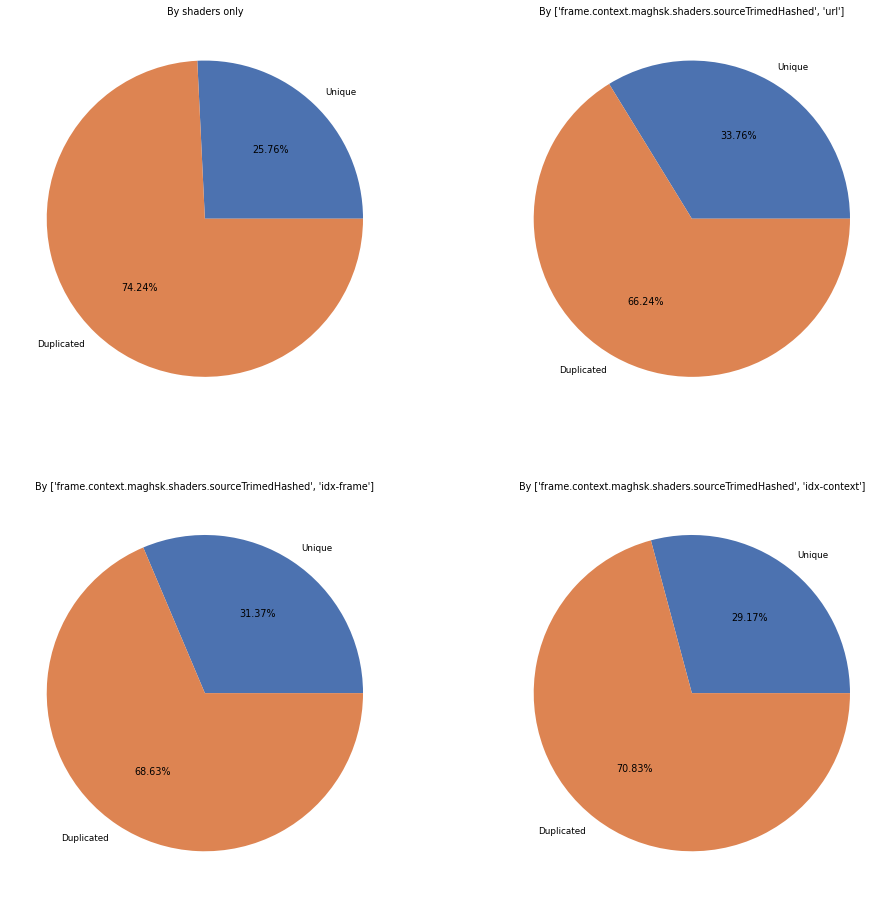

In [93]:
# create figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
tmp = df_shaders_trim[df_shaders_trim['frame.context.maghsk.shaders.type'] == 'frag']
# add four figures above to the figure
# subset = [None, ['frame.context.maghsk.shaders.sourceTrimedHashed', 'index-url'], ['frame.context.maghsk.shaders.sourceTrimedHashed', 'index-context']]
subset = [None, ['frame.context.maghsk.shaders.sourceTrimedHashed', 'url'], ['frame.context.maghsk.shaders.sourceTrimedHashed', 'idx-frame'], ['frame.context.maghsk.shaders.sourceTrimedHashed', 'idx-context']]
for i in range(4):
    if subset[i] is None:
        df_shaders_trim_dedup = tmp
    else:
        df_shaders_trim_dedup = tmp.drop_duplicates(subset=subset[i], keep='first')
    # caculate the duplicity of df_shaders_trim_dedup, by column 'frame.context.maghsk.shaders.sourceTrimedHashed'
    ratio = 1.0 - df_shaders_trim_dedup.duplicated(subset=['frame.context.maghsk.shaders.sourceTrimedHashed'], keep='first').sum() / len(df_shaders_trim_dedup)
    by_str = str(subset[i]) if subset[i] is not None else 'shaders only'
    print("Percentage of all unique shaders by {}: {:.2f}%".format(by_str, ratio*100))
    axes[i//2][i%2].pie([ratio, 1-ratio], labels=['Unique', 'Duplicated'], autopct='%.2f%%')
    axes[i//2][i%2].set_title('By {}'.format(by_str))
plt.show()

Percentage of all unique shaders by shaders only: 19.45%
Percentage of all unique shaders by ['frame.context.maghsk.shaders.sourceTrimedHashed', 'url']: 29.88%
Percentage of all unique shaders by ['frame.context.maghsk.shaders.sourceTrimedHashed', 'idx-frame']: 28.19%
Percentage of all unique shaders by ['frame.context.maghsk.shaders.sourceTrimedHashed', 'idx-context']: 25.90%


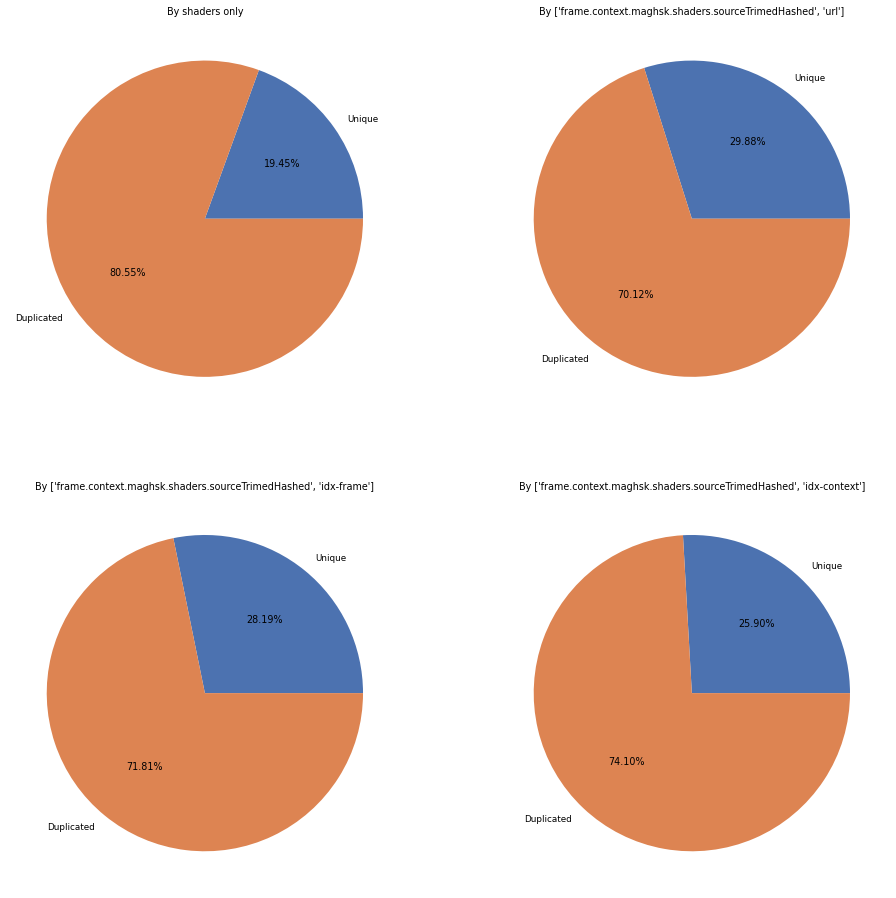

In [94]:
# create figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
tmp = df_shaders_trim[df_shaders_trim['frame.context.maghsk.shaders.type'] == 'vert']
# add four figures above to the figure
# subset = [None, ['frame.context.maghsk.shaders.sourceTrimedHashed', 'index-url'], ['frame.context.maghsk.shaders.sourceTrimedHashed', 'index-context']]
subset = [None, ['frame.context.maghsk.shaders.sourceTrimedHashed', 'url'], ['frame.context.maghsk.shaders.sourceTrimedHashed', 'idx-frame'], ['frame.context.maghsk.shaders.sourceTrimedHashed', 'idx-context']]
for i in range(4):
    if subset[i] is None:
        df_shaders_trim_dedup = tmp
    else:
        df_shaders_trim_dedup = tmp.drop_duplicates(subset=subset[i], keep='first')
    # caculate the duplicity of df_shaders_trim_dedup, by column 'frame.context.maghsk.shaders.sourceTrimedHashed'
    ratio = 1.0 - df_shaders_trim_dedup.duplicated(subset=['frame.context.maghsk.shaders.sourceTrimedHashed'], keep='first').sum() / len(df_shaders_trim_dedup)
    by_str = str(subset[i]) if subset[i] is not None else 'shaders only'
    print("Percentage of all unique shaders by {}: {:.2f}%".format(by_str, ratio*100))
    axes[i//2][i%2].pie([ratio, 1-ratio], labels=['Unique', 'Duplicated'], autopct='%.2f%%')
    axes[i//2][i%2].set_title('By {}'.format(by_str))
plt.show()

### shader Count

count    9359.000000
mean       11.615023
std        13.716966
min         1.000000
50%         8.000000
75%        17.000000
90%        24.000000
95%        33.000000
99%        58.000000
max       346.000000
Name: frame.context.maghsk.shaders.sourceTrimedHashed, dtype: float64

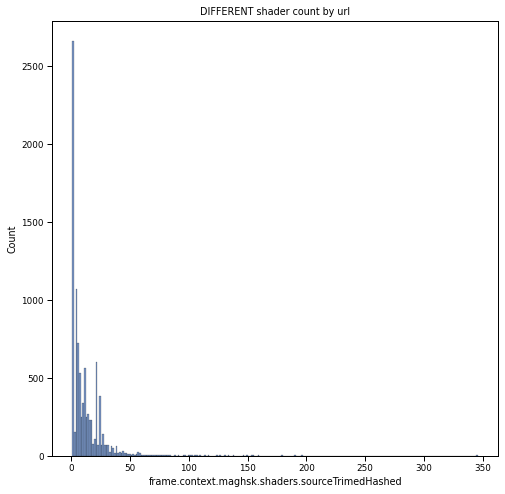

In [21]:
url_shader_count = df_shaders_trim.groupby('url')['frame.context.maghsk.shaders.sourceTrimedHashed'].nunique()
plt.figure(figsize=(8, 8))
sns.histplot(data=url_shader_count, multiple="stack")
plt.title('DIFFERENT shader count by url')
plt.plot()
url_shader_count.describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99])

count    9359.000000
mean       16.386366
std        51.557852
min         1.000000
50%         8.000000
75%        20.000000
90%        32.000000
95%        47.000000
99%       116.000000
max      4144.000000
Name: frame.context.maghsk.shaders.sourceTrimedHashed, dtype: float64

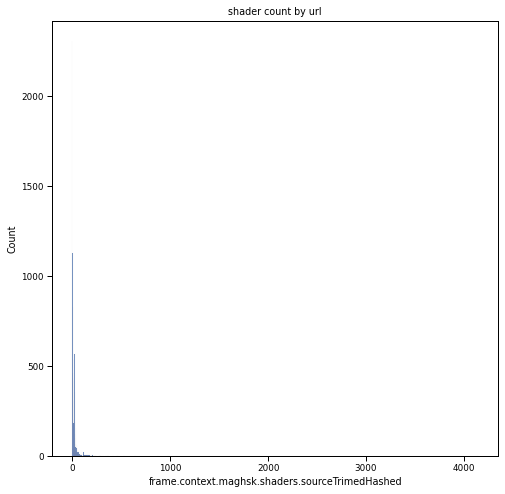

In [22]:
url_shader_count = df_shaders_trim.groupby('url')['frame.context.maghsk.shaders.sourceTrimedHashed'].count()
plt.figure(figsize=(8, 8))
sns.histplot(data=url_shader_count, multiple="stack")
plt.title('shader count by url')
plt.plot()
url_shader_count.describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99])

### shader length

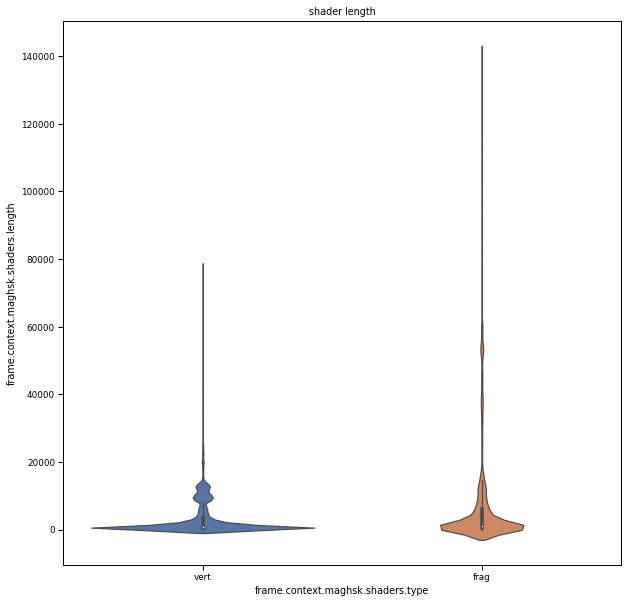

In [23]:
plt.figure(figsize=(10, 10))
# sns.histplot(data=df_shaders_trim_dedup, x="shader_length", hue="shader_type", multiple="layer", element="step")
# sns.violinplot(data=df_shaders_trim, x="shader_type", y="shader_length")
sns.violinplot(data=df_shaders_trim, x="frame.context.maghsk.shaders.type", y="frame.context.maghsk.shaders.length")
plt.title('shader length')
plt.show()

# TODO:
-------

In [ ]:
df_traces_status = pd.DataFrame(list(df_traces['status']), index=df_traces.index, dtype='string')
df_traces_status = df_traces_status.add_prefix('status-')
df_traces.drop(columns=['status'], inplace=True)
df_traces = df_traces.merge(df_traces_status, left_index=True, right_index=True)

In [ ]:
tmp = df_traces['gl_info_raf'].dropna(inplace=False)
df_url = pd.DataFrame(tmp.to_list(), index=tmp.index).drop(columns=['url'])
df_url = df_traces.merge(df_url, how='left', left_index=True, right_index=True)
df_url.reset_index(inplace=True)

In [ ]:
df_url.rename(columns={
    'filename': 'instrument-filename',
    'url': 'instrument-url',
    'start_time': 'instrument-start_time',
    'duration': 'instrument-duration',
    'har': 'instrument-har',
    'accessTime': 'url-accessTime',
    'rafFuncCountList': 'url-rafFuncCountList',
    'title': 'url-title',
    'usedOffScreenCanvas': 'url-usedOffScreenCanvas',
    'when': 'url-when',
    'whenDomContentLoadedEvent': 'url-whenDomContentLoadedEvent',
    'whenLoadEvent': 'url-whenLoadEvent',
    'whenUsedWebgl': 'url-whenUsedWebgl',
}, inplace=True)

In [ ]:
df_url[df_url['instrument-url'] == 'http://frontside.com.au']

In [ ]:
df_exploded = df_url.explode('contextInfo').dropna(subset=['contextInfo'])
df_context = pd.DataFrame(list(df_exploded['contextInfo']), index=df_exploded.index).drop(columns=['triangleCount']).add_prefix('context-')
df_url.drop(columns=['contextInfo'], inplace=True)
df_context = df_url.drop(columns=['gl_info_raf']).merge(df_context, how='left', left_index=True, right_index=True)
df_context.reset_index(inplace=True, drop=True)
df_context.index.name = 'context-id'

In [ ]:
tmp = df_context['context-maghsk'].dropna(inplace=False)
df_maghsk = pd.DataFrame(tmp.to_list(), index=tmp.index).add_prefix('context-maghsk-')
tmp = df_context['context-memoryInfo'].dropna(inplace=False)
df_memory = pd.DataFrame(tmp.to_list(), index=tmp.index).add_prefix('context-mem-')
tmp = df_context['context-contextAttributes'].dropna(inplace=False)
df_ctxattr = pd.DataFrame(tmp.to_list(), index=tmp.index).add_prefix('context-attributes-')

df_context = df_context.drop(columns=['context-maghsk']).merge(df_maghsk, how='left', left_index=True, right_index=True)
df_context = df_context.drop(columns=['context-memoryInfo']).merge(df_memory, how='left', left_index=True, right_index=True)
df_context = df_context.drop(columns=['context-contextAttributes']).merge(df_ctxattr, how='left', left_index=True, right_index=True)

In [ ]:
df_context = df_context.astype({
    'instrument-filename' : 'string',
    'instrument-url' : 'string',
    'instrument-start_time' : 'Float64',
    'instrument-duration' : 'Float64',
    'instrument-har' : 'object',
    'url-accessTime' : 'Float64',
    'url-rafFuncCountList' : 'object',
    'url-title' : 'string',
    'url-usedOffScreenCanvas' : 'boolean',
    'url-when' : 'Float64',
    'url-whenDomContentLoadedEvent' : 'Float64',
    'url-whenLoadEvent' : 'Float64',
    'url-whenUsedWebgl' : 'Float64',
    'context-canvasContained' : 'boolean',
    'context-canvasHidden' : 'boolean',
    'context-canvasSize' : 'object',
    'context-capturedFunctionsLength' : 'Float64',
    'context-extensions' : 'object',
    'context-programInfo' : 'object',
    'context-vertexCount' : 'Float64',
    'context-maghsk-counter' : 'object',
    'context-maghsk-createArguments' : 'object',
    'context-maghsk-createTime' : 'Float64',
    'context-maghsk-rafList' : 'object',
    'context-maghsk-pixelsRead' : 'Float64',
    'context-mem-memory' : 'object',
    'context-mem-resources' : 'object',
    'context-attributes-alpha' : 'boolean',
    'context-attributes-antialias' : 'boolean',
    'context-attributes-depth' : 'boolean',
    'context-attributes-desynchronized' : 'boolean',
    'context-attributes-failIfMajorPerformanceCaveat' : 'boolean',
    'context-attributes-powerPreference' : 'string',
    'context-attributes-premultipliedAlpha' : 'boolean',
    'context-attributes-preserveDrawingBuffer' : 'boolean',
    'context-attributes-stencil' : 'boolean',
    'context-attributes-xrCompatible' : 'boolean',
})

In [ ]:
tmp = df_context['context-maghsk-counter'].dropna(inplace=False)
df_maghsk = pd.DataFrame(tmp.to_list(), index=tmp.index).add_prefix('context-maghsk-counter-')
tmp = df_context['context-mem-memory'].dropna(inplace=False)
df_memory = pd.DataFrame(tmp.to_list(), index=tmp.index).add_prefix('context-mem-memory-')
tmp = df_context['context-mem-resources'].dropna(inplace=False)
df_ctxattr = pd.DataFrame(tmp.to_list(), index=tmp.index).add_prefix('context-mem-resources-')

df_context = df_context.drop(columns=['context-maghsk-counter']).merge(df_maghsk, how='left', left_index=True, right_index=True)
df_context = df_context.drop(columns=['context-mem-memory']).merge(df_memory, how='left', left_index=True, right_index=True)
df_context = df_context.drop(columns=['context-mem-resources']).merge(df_ctxattr, how='left', left_index=True, right_index=True)

In [ ]:
# context-maghsk-counter-funcCount	context-maghsk-counter-semanticVertexCalled	context-maghsk-counter-semanticVertexCount

tmp = df_context['context-maghsk-counter-semanticVertexCalled'].dropna(inplace=False)
df_memory = pd.DataFrame(tmp.to_list(), index=tmp.index)[['0','1','2','3','4','5','6']].add_prefix('context-maghsk-counter-vertex_call-')
tmp = df_context['context-maghsk-counter-semanticVertexCount'].dropna(inplace=False)
df_ctxattr = pd.DataFrame(tmp.to_list(), index=tmp.index)[['0','1','2','3','4','5','6']].add_prefix('context-maghsk-counter-vertex_count-')
tmp = df_context['context-maghsk-counter-funcCount'].dropna(inplace=False)
df_maghsk = pd.DataFrame(tmp.to_list(), index=tmp.index).add_prefix('context-maghsk-counter-funcCount-')

df_context = df_context.drop(columns=['context-maghsk-counter-semanticVertexCalled']).merge(df_memory, how='left', left_index=True, right_index=True)
df_context = df_context.drop(columns=['context-maghsk-counter-semanticVertexCount']).merge(df_ctxattr, how='left', left_index=True, right_index=True)
df_context = df_context.drop(columns=['context-maghsk-counter-funcCount']).merge(df_maghsk, how='left', left_index=True, right_index=True)

In [ ]:
df_exploded = df_context.explode('context-programInfo').explode('context-programInfo').dropna(subset=['context-programInfo'])
df_program = pd.DataFrame(df_exploded['context-programInfo'].to_list(), index=df_exploded.index).add_prefix('context-program-')
df_context.drop(columns=['context-programInfo'], inplace=True)
df_program = df_context.merge(df_program, how='left', left_index=True, right_index=True)
df_program.reset_index(inplace=True, drop=False)
df_program.rename(columns={'index':'context-program-context_id'}, inplace=True)

In [ ]:
df_program.index.name = 'context-program-id'

In [ ]:
df_raf = df_context.dropna(subset=['context-maghsk-rafList'])[['instrument-filename', 'instrument-url', 'context-maghsk-rafList']]
df_raf

In [ ]:
df_tmp = df_raf.explode('context-maghsk-rafList').dropna(subset=['context-maghsk-rafList'])
df_raflist = pd.DataFrame(df_tmp['context-maghsk-rafList'].to_list(), index=df_tmp.index).add_prefix('rafList-')
df_raflist = df_raf.merge(df_raflist, how='left', left_index=True, right_index=True).drop(columns=['context-maghsk-rafList'])
df_raflist

In [ ]:
df_raflist[df_raflist['rafList-semanticVertexCalled'].isna()]

In [ ]:
assert df_raflist[df_raflist['rafList-semanticVertexCalled'].isna()].shape[0] == 0

In [ ]:
df_a = pd.DataFrame(df_raflist['rafList-semanticVertexCalled'].to_list(), index=df_raflist.index)[['0','1','2','3','4','5','6']].add_prefix('rafList-semanticVertexCalled-')
df_b = pd.DataFrame(df_raflist['rafList-semanticVertexCount'].to_list(), index=df_raflist.index)[['0','1','2','3','4','5','6']].add_prefix('rafList-semanticVertexCount-')
df_c = pd.DataFrame(df_raflist['rafList-funcCount'].to_list(), index=df_raflist.index).add_prefix('rafList-funcCount-')

In [ ]:
# concat df_a, df_b, df_c
df_raflist_abc = pd.concat([df_raflist, df_a, df_b, df_c], axis=1)
df_raflist_abc.drop(columns=['rafList-funcCount', 'rafList-semanticVertexCalled', 'rafList-semanticVertexCount'], inplace=True)
df_raflist_abc

In [ ]:
rename_dict = {}
for i in range(7):
    rename_dict[f'rafList-semanticVertexCalled-{i}'] = f'rafList-semanticVertexCalled-{gl_types[i]}'
    rename_dict[f'rafList-semanticVertexCount-{i}'] = f'rafList-semanticVertexCount-{gl_types[i]}'
df_raflist_abc.rename(columns=rename_dict, inplace=True)
df_raflist_abc

In [ ]:
# df_raflist_abc group by context-id and shift and minus
df_tmp = df_raflist_abc.drop(columns=['instrument-filename', 'instrument-url', 'rafList-when'])
df_tmp = df_tmp.groupby('context-id').shift(0) - df_tmp.groupby('context-id').shift(1)
# df_tmp.dropna(subset=['rafList-bufferDataSent'], inplace=True)
df_tmp_groupby = df_tmp.groupby('context-id')

In [ ]:
df_raf_stat = df_tmp_groupby.agg(['mean', 'std', 'count'])

In [ ]:
df_raf_stat_subset = df_raf_stat[['rafList-semanticVertexCalled-POINTS', 'rafList-semanticVertexCalled-LINES', 'rafList-semanticVertexCalled-LINE_LOOP', 'rafList-semanticVertexCalled-LINE_STRIP', 'rafList-semanticVertexCalled-TRIANGLES', 'rafList-semanticVertexCalled-TRIANGLE_STRIP', 'rafList-semanticVertexCalled-TRIANGLE_FAN', 'rafList-semanticVertexCount-POINTS', 'rafList-semanticVertexCount-LINES', 'rafList-semanticVertexCount-LINE_LOOP', 'rafList-semanticVertexCount-LINE_STRIP', 'rafList-semanticVertexCount-TRIANGLES', 'rafList-semanticVertexCount-TRIANGLE_STRIP', 'rafList-semanticVertexCount-TRIANGLE_FAN']]
df_raf_stat_subset

# Save to disk

In [ ]:
pickle_output_path = Path('output/pickle')
excel_output_path = Path('output/excel')

In [ ]:
pickle_output_path.mkdir(parents=True, exist_ok=True)
excel_output_path.mkdir(parents=True, exist_ok=True)

In [ ]:
# save to pickle first
df_url.to_pickle(pickle_output_path / '0417-raf_url.pkl.zstd', compression='zstd')
df_context.to_pickle(pickle_output_path / '0417-raf_context.pkl.zstd', compression='zstd')
df_program.to_pickle(pickle_output_path / '0417-raf_program.pkl.zstd', compression='zstd')
df_raflist_abc.to_pickle(pickle_output_path / '0417-raf_raflist_abc.pkl.zstd', compression='zstd')
df_raf_stat.to_pickle(pickle_output_path / '0417-raf_stat.pkl.zstd', compression='zstd')

In [ ]:
# df_url.to_excel(excel_output_path / '0417-raf_url.xlsx', index=True)
# df_context.to_excel(excel_output_path / '0417-raf_context.xlsx', index=True)
# df_raf_stat_subset.to_excel(excel_output_path / '0417-raf_stat_subset.xlsx', index=True)